# Data Analysis

### Import dependencies

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from datetime import datetime

### Load data

In [3]:
flights = pd.read_csv("/work/Dataset_Post_Engineer.csv", sep=",")
flights.head()

,Flight_ID,Aeronave,DepartureStation,ArrivalStation,Destination_Type,Origin_Type,STD,STA,Capacity,Passengers,...,Total_Quantity,DayoftheWeek,WeekoftheYear,Month,Week_Month_Label,DUR_INTERVAL,Time_Interval,DayoftheWeek_E,Time_Interval_E,Week_Month_Label_E
0,ab954014077430bd842cfa305a55c0f8,XA-VBY,AT,AZ,Ciudad Fronteriza,Ciudad Principal,2023-10-19 11:40:00,2023-10-19 14:25:00,240,229.0,...,42.0,Thursday,42,10,Week 42 (Oct),2.0,06:00-12:00,4.0,1.0,42.0
1,efd86c996035dacdca7a0ccb2560dda1,XA-VIX,BM,AV,MX Amigos y Familia,Ciudad Fronteriza,2023-07-03 00:55:00,2023-07-03 04:55:00,186,186.0,...,15.0,Monday,27,7,Week 27 (Jul),3.0,00:00-06:00,1.0,0.0,22.0
2,dd0fad3248951d2f71d63e6279aeaa4b,XA-VBW,AW,AS,MX Amigos y Familia,Ciudad Principal,2023-06-26 15:15:00,2023-06-26 15:55:00,220,200.0,...,0.0,Monday,26,6,Week 26 (Jun),0.0,12:00-18:00,1.0,2.0,21.0
3,d0987ee648eea254063bfe2b39571b67,XA-VAP,BA,AB,Playa,Ciudad Principal,2023-02-10 08:40:00,2023-02-10 09:50:00,186,162.0,...,22.0,Friday,6,2,Week 6 (Feb),1.0,06:00-12:00,0.0,1.0,57.0
4,3b5df8805161ea827d2f2e4298c38e06,XA-VBY,AJ,AR,Playa,MX Amigos y Familia,2023-09-07 17:10:00,2023-09-07 18:05:00,240,183.0,...,2.0,Thursday,36,9,Week 36 (Sep),0.0,12:00-18:00,4.0,2.0,34.0


### Relation for passengers

Which variables impact the target passengers?

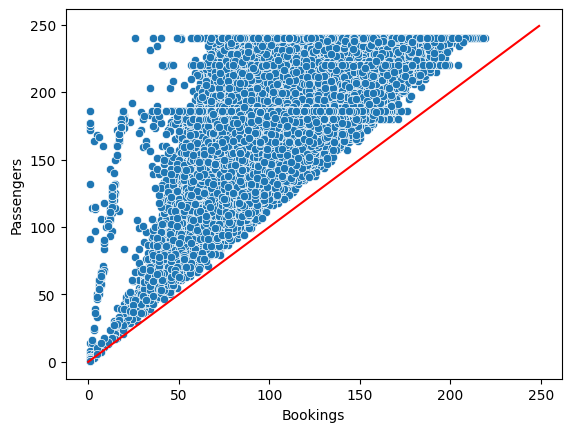

In [ ]:
sns.scatterplot(flights, x="Bookings", y="Passengers")
plt.plot(np.arange(0,250,1), np.arange(0,250,1), c="r")

<AxesSubplot: xlabel='Passengers', ylabel='Count'>

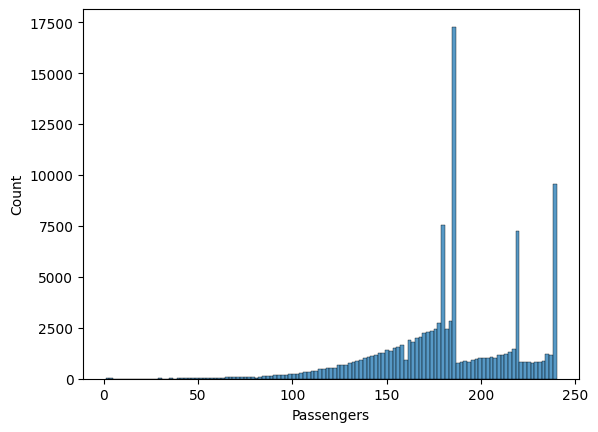

In [ ]:
sns.histplot(flights, x="Passengers")

### Passengers vs Capacity

<AxesSubplot: ylabel='Count'>

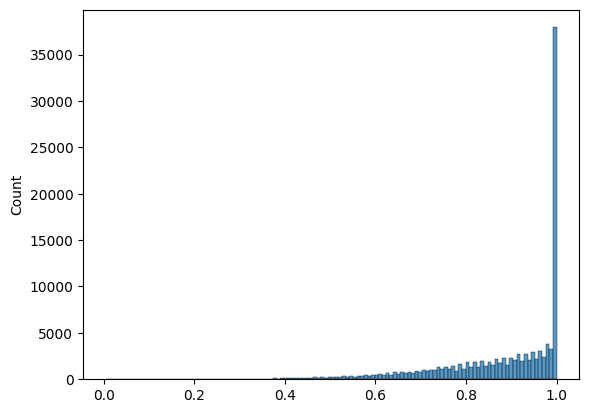

In [ ]:
x = flights["Passengers"] / flights["Capacity"]
sns.histplot(x)

<AxesSubplot: >

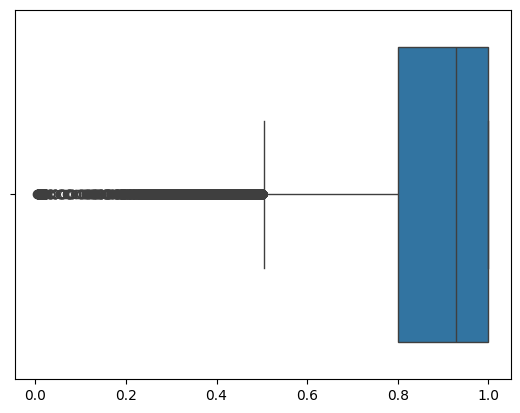

In [ ]:
sns.boxplot(x, orient="h")

<AxesSubplot: xlabel='Passengers', ylabel='Total_Quantity'>

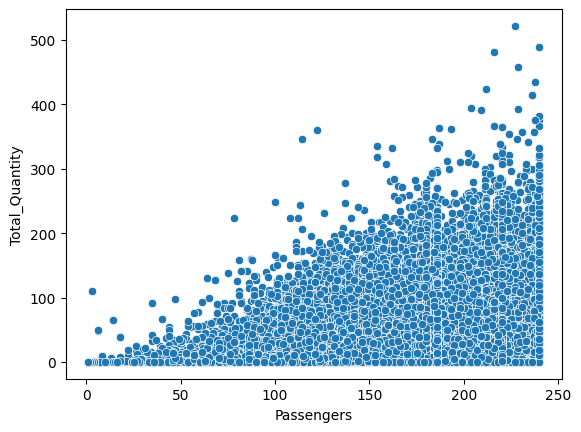

In [ ]:
#x = flights["Real Passengers"] / flights["Total_Quantity"]
sns.scatterplot(flights, x="Passengers", y="Total_Quantity")

In [ ]:
flights["DayoftheWeek"]

0          Thursday
1            Monday
2            Monday
3            Friday
4          Thursday
            ...    
119636    Wednesday
119637      Tuesday
119638     Thursday
119639       Friday
119640       Friday
Name: DayoftheWeek, Length: 119641, dtype: object

### Products by Day of the Week

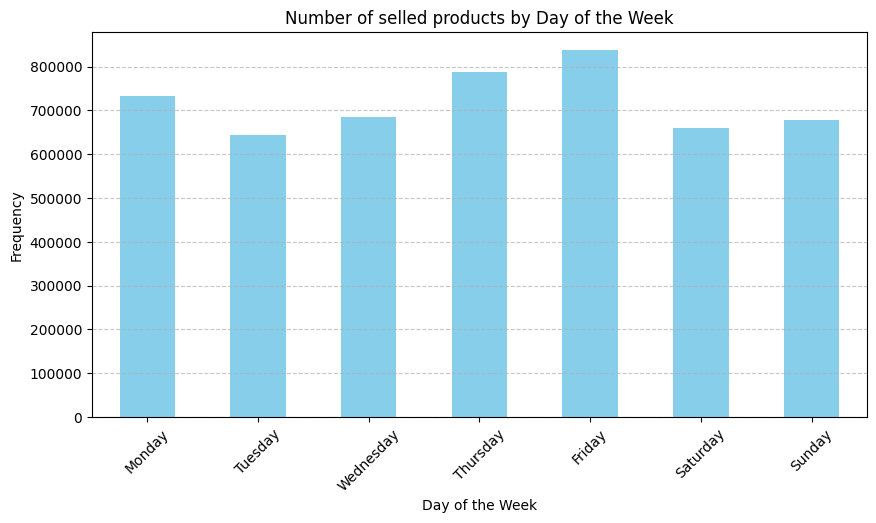

In [ ]:
grouped_temp = flights.groupby("DayoftheWeek")["Total_Quantity"].sum()

# Sort by the day of the week
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
grouped_temp = grouped_temp.reindex(order)

# Plotting
plt.figure(figsize=(10, 5))
grouped_temp.plot(kind='bar', color='skyblue')
plt.title('Number of selled products by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Duration Analysis

Text(0, 0.5, 'Total Items')

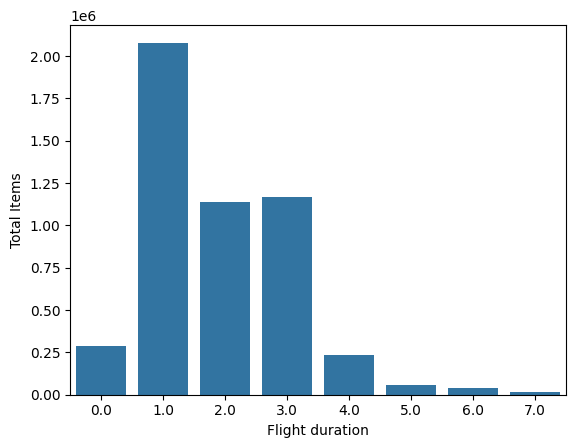

In [ ]:
sns.barplot(flights.groupby("DUR_INTERVAL", observed=True)["Total_Quantity"].sum())
plt.xlabel("Flight duration")
plt.ylabel("Total Items")

<AxesSubplot: xlabel='DUR_INTERVAL', ylabel='Total_Quantity'>

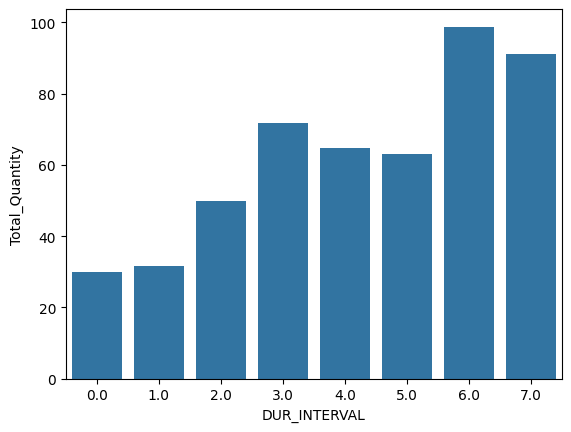

In [ ]:
# Divide the amount by the number of flights with that duration
sns.barplot(flights.groupby("DUR_INTERVAL", observed=True)["Total_Quantity"].sum() / flights.groupby("DUR_INTERVAL", observed=True)["Total_Quantity"].count())


We appreciate that longer flights have a higher amount of items sold.

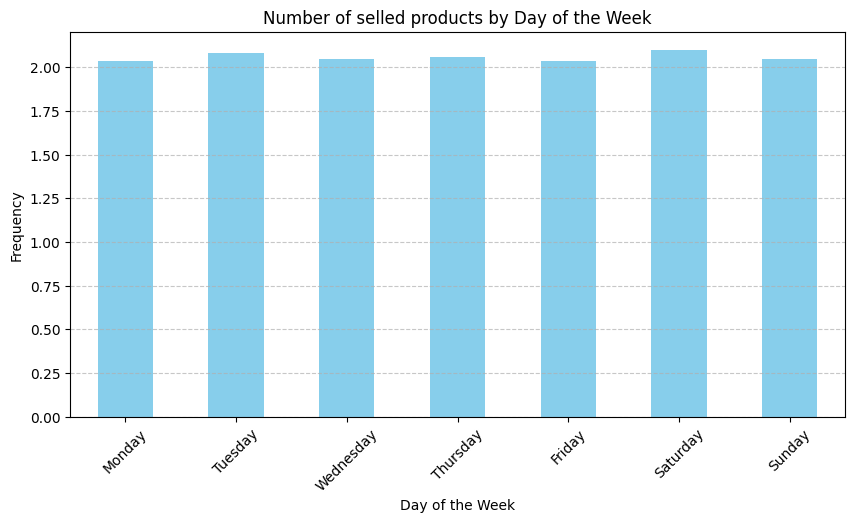

In [ ]:
grouped_temp = flights.groupby("DayoftheWeek")["DUR_HR"].mean()

# Sort by the day of the week
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
grouped_temp = grouped_temp.reindex(order)

# Plotting
plt.figure(figsize=(10, 5))
grouped_temp.plot(kind='bar', color='skyblue')
plt.title('Number of selled products by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

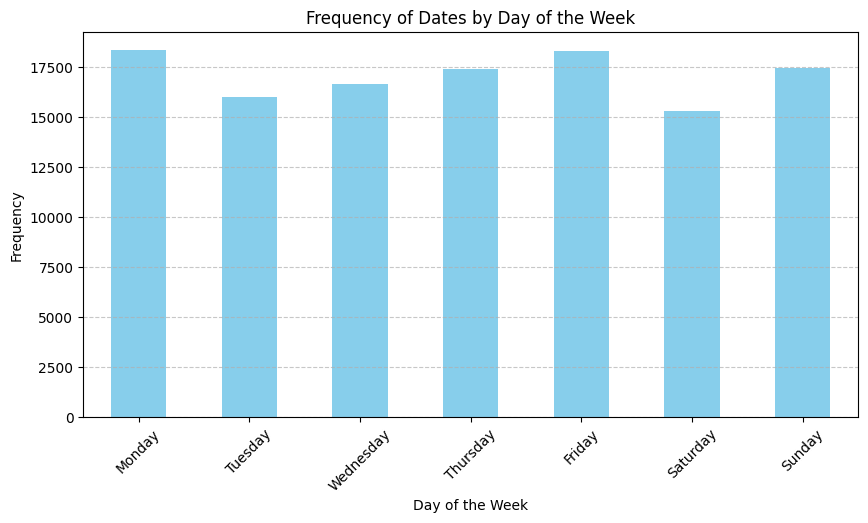

In [8]:
day_counts = flights['DayoftheWeek'].value_counts()

order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_counts = day_counts.reindex(order)

# Plotting
plt.figure(figsize=(10, 5))
day_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Flights by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

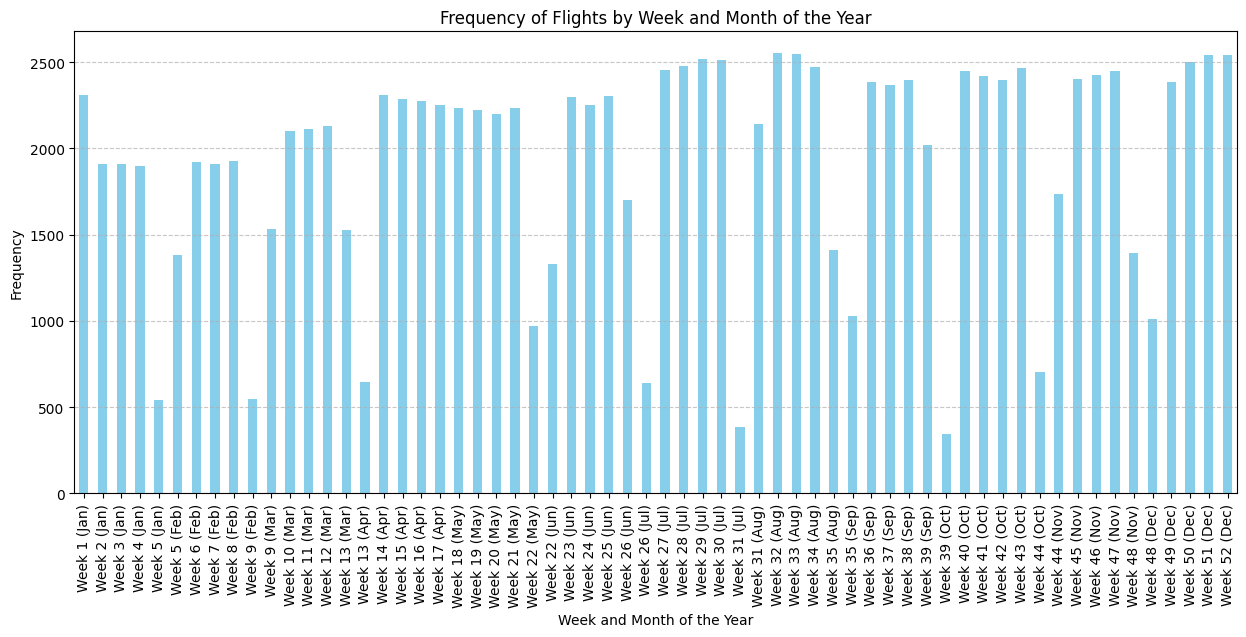

In [4]:
week_month_counts = flights.groupby('Week_Month_Label').size()

week_month_counts = week_month_counts.reindex(
    index=flights.drop_duplicates('Week_Month_Label').sort_values('STD')['Week_Month_Label']
)

# Plotting
plt.figure(figsize=(15, 6))
week_month_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Flights by Week and Month of the Year')
plt.xlabel('Week and Month of the Year')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Plane Type

### Aeronave vs Product Quantity vs Frequency

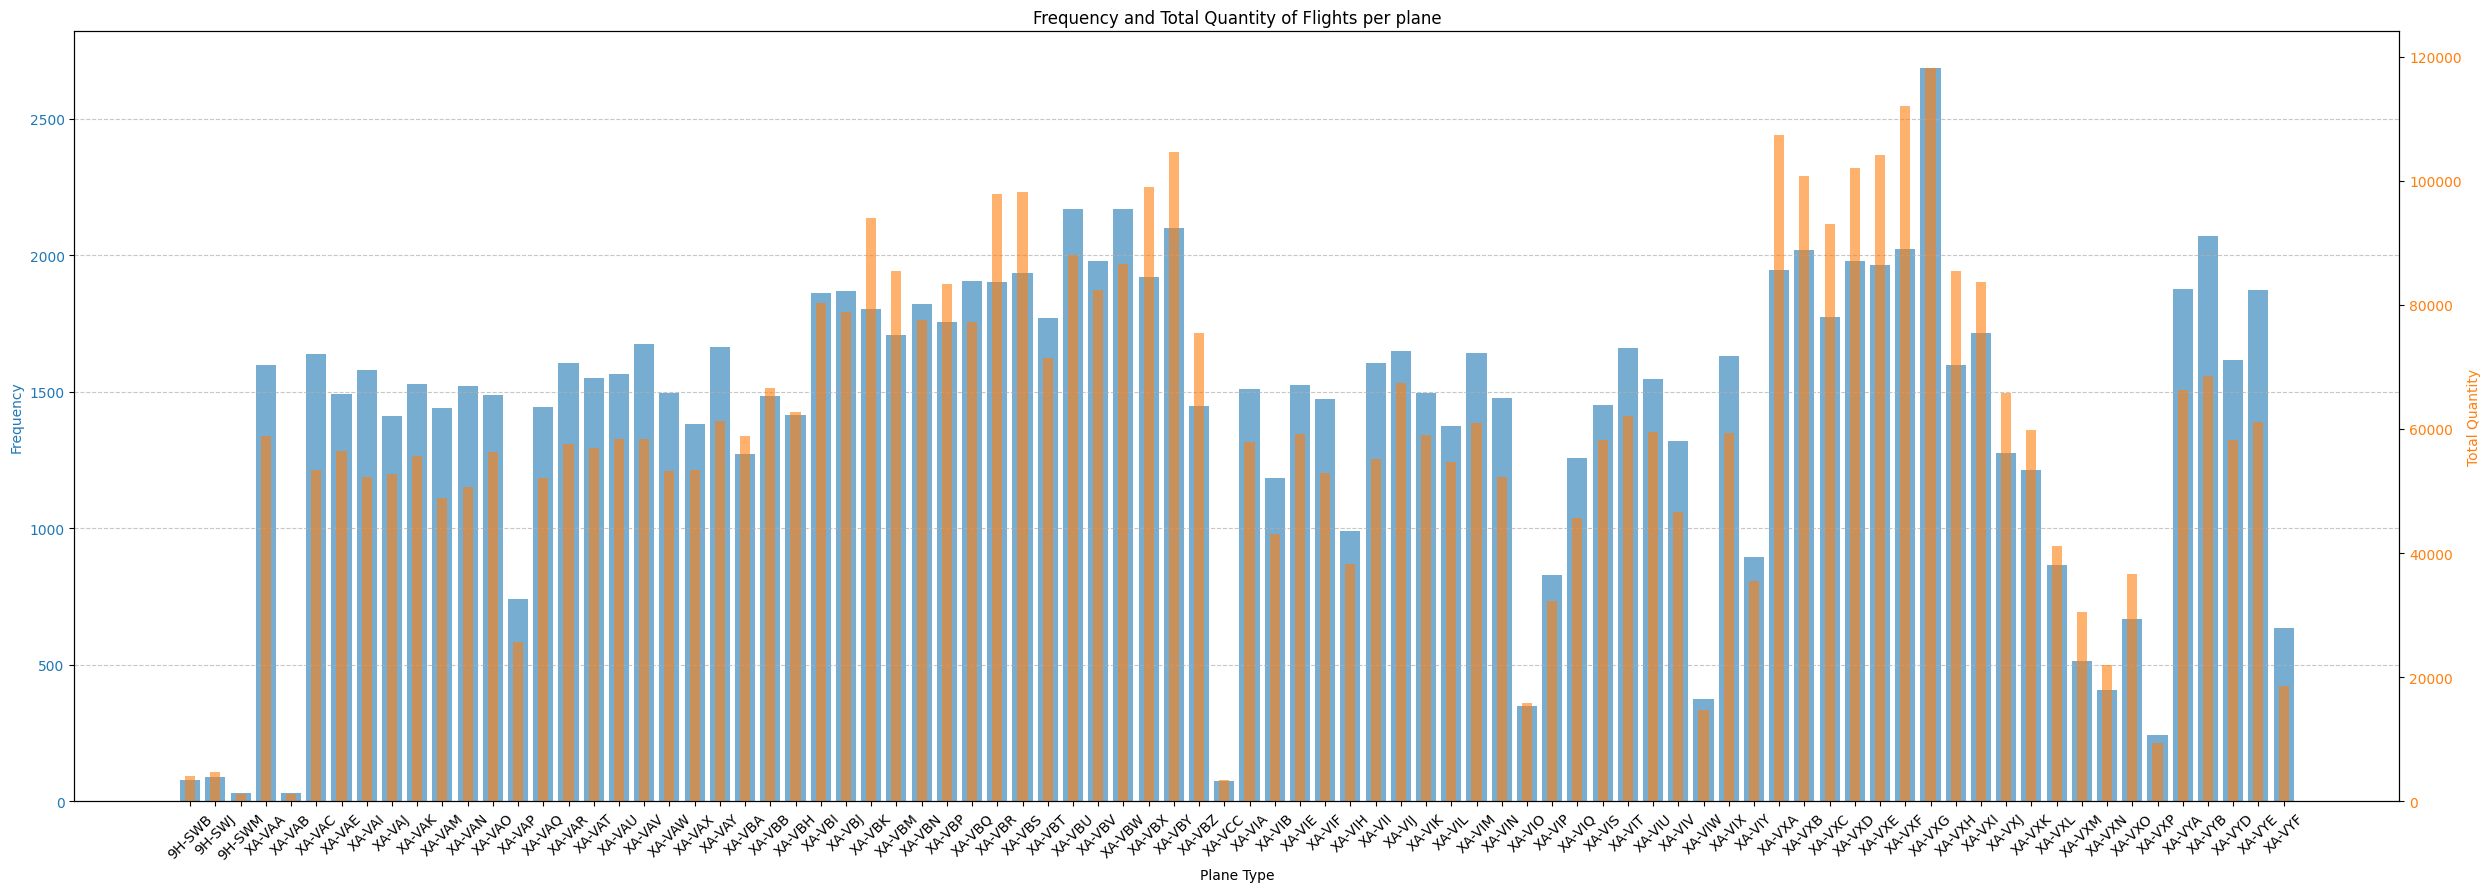

In [ ]:
# Group by 'Aeronave' and aggregate both counts and sum of 'Total_Quantity'
plane_type_info = flights.groupby('Aeronave').agg({'Aeronave': 'count', 'Total_Quantity': 'sum'})

# Rename columns for clarity
plane_type_info.columns = ['Frequency', 'Total_Quantity']

# Plotting
fig, ax1 = plt.subplots(figsize=(30, 10))
plt.xticks(rotation=45)

color = 'tab:blue'
ax1.set_xlabel('Plane Type')
ax1.set_ylabel('Frequency', color=color)
ax1.bar(plane_type_info.index, plane_type_info['Frequency'], color=color, alpha=0.6, width=0.8)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

ax2 = ax1.twinx()  
color = 'tab:orange'
ax2.set_ylabel('Total Quantity', color=color)
ax2.bar(plane_type_info.index, plane_type_info['Total_Quantity'], color=color, alpha=0.6, width=0.4)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Frequency and Total Quantity of Flights per plane')
plt.show()

### Amount of products sold by day interval

Time intervals frequency:  Time_Interval
00:00-06:00     4549
06:00-12:00    43405
12:00-18:00    38410
18:00-24:00    33277
Name: Time_Interval, dtype: int64


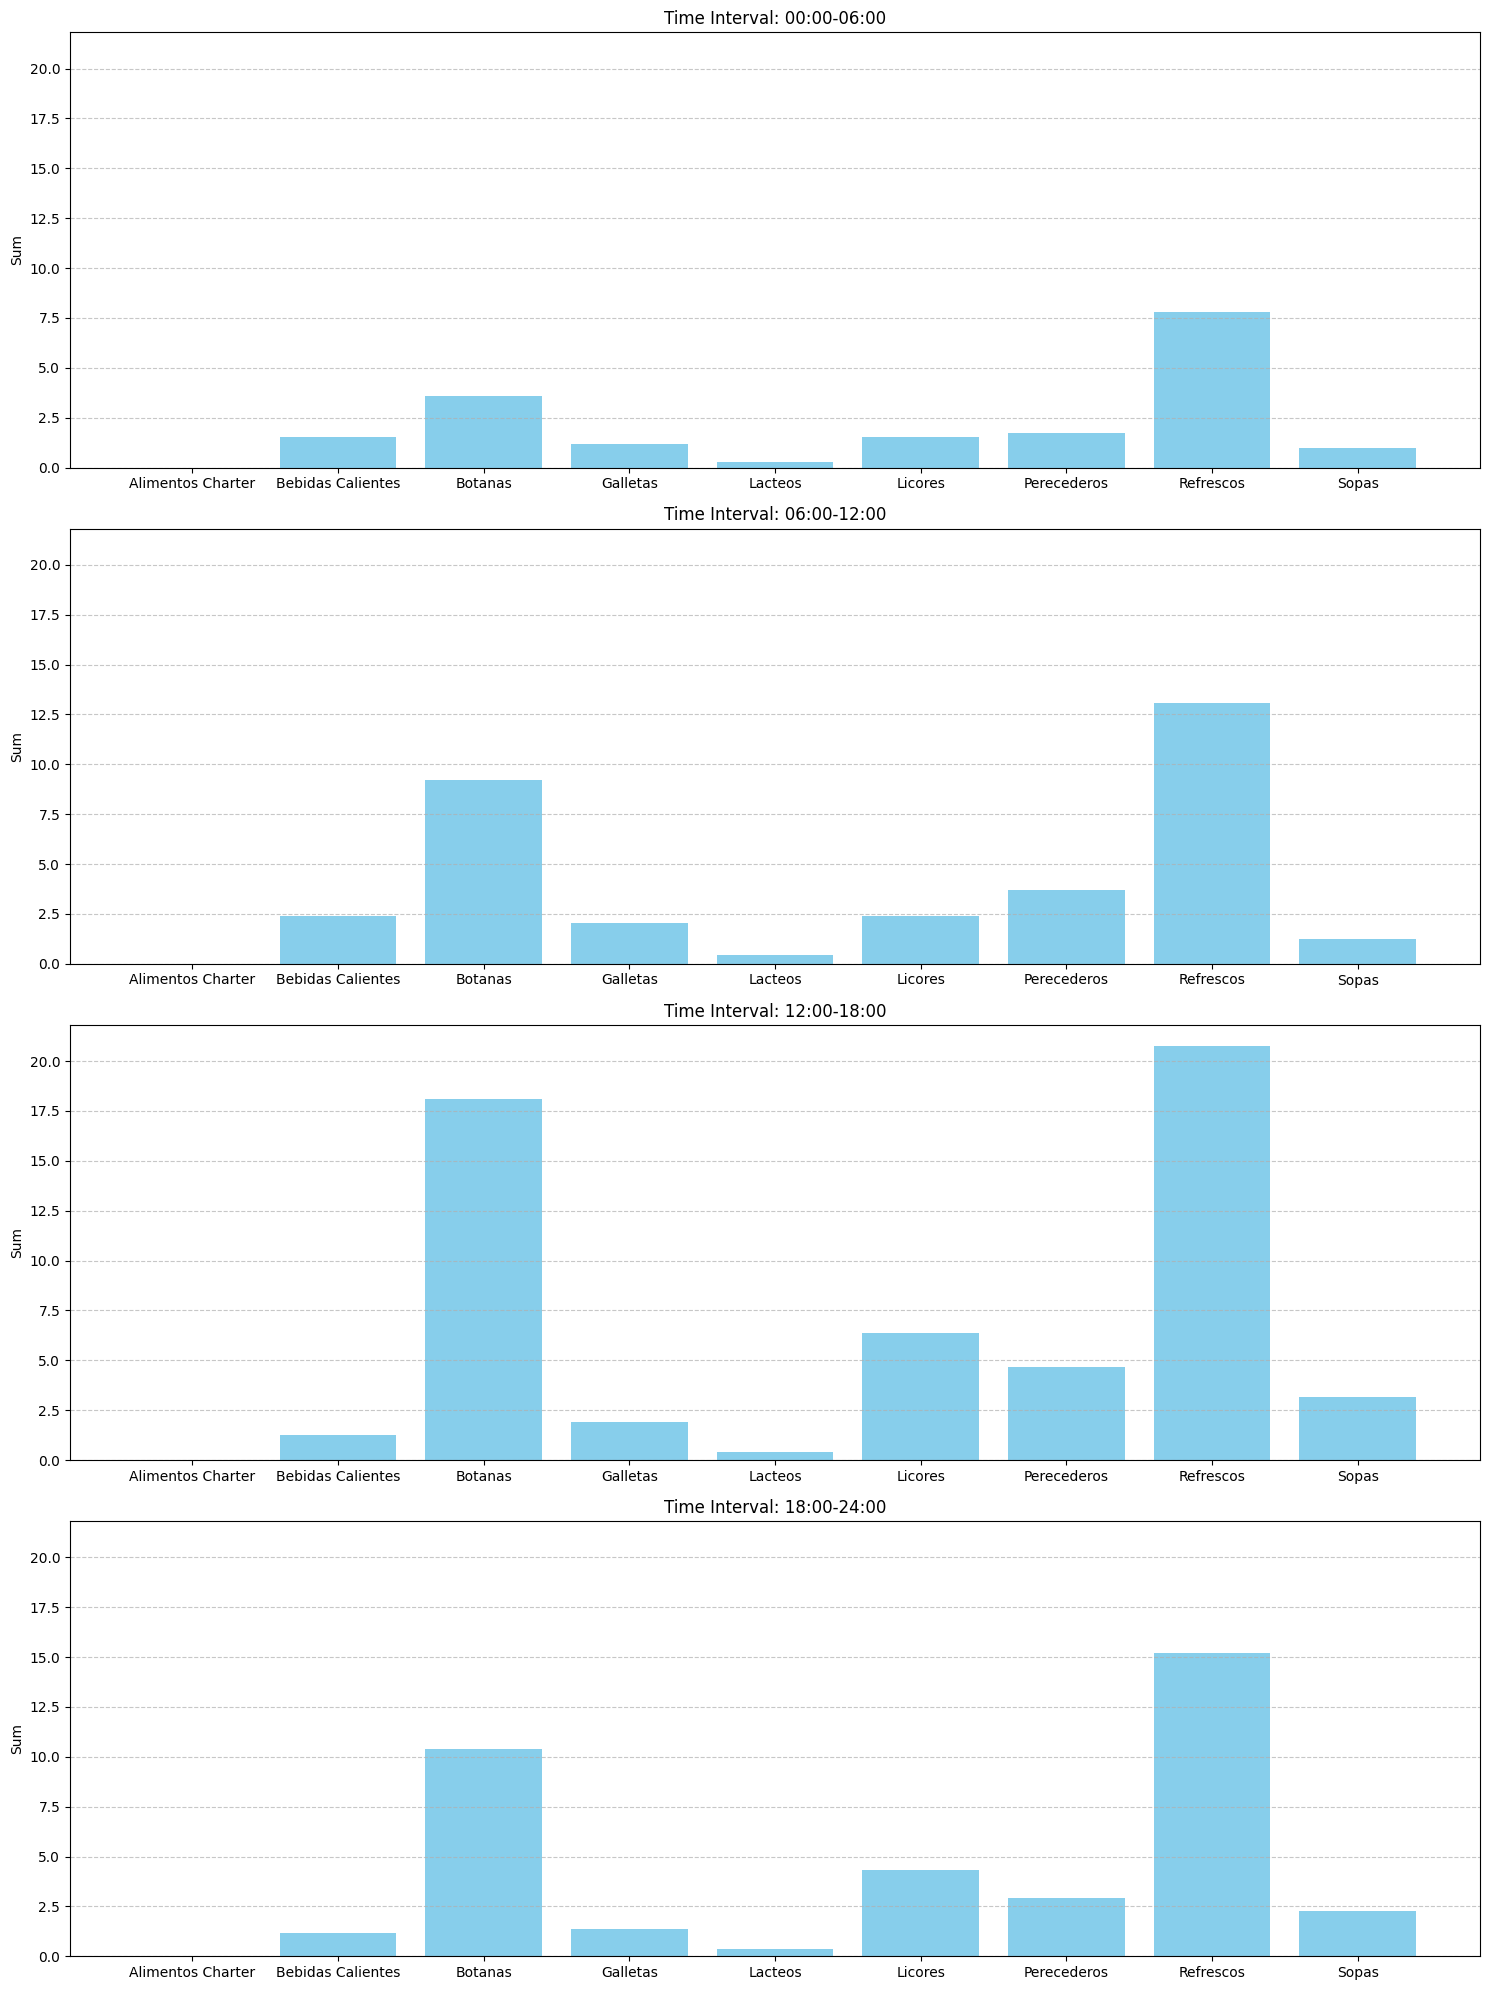

In [ ]:
# Por intervalo de horas / histograma de productos
# flights = flights.copy()

# # Create a new column to categorize timestamps into four intervals
# test_df['Time_Interval'] = pd.cut(test_df['STD'].dt.hour,
#                                 bins=[0, 6, 12, 18, 24],
#                                 labels=['00:00-06:00', '06:00-12:00', '12:00-18:00', '18:00-24:00'],
#                                 right=False)

# For matplotlib warnings

import warnings
warnings.filterwarnings("ignore")

# Group by 'Time_Interval' and sum the desired columns
grouped_data = flights.groupby(['Time_Interval']).agg({
    'Quantity_Alimentos Charter': 'sum',
    'Quantity_Bebidas Calientes': 'sum',
    'Quantity_Botanas': 'sum',
    'Quantity_Galletas': 'sum',
    'Quantity_Lacteos': 'sum',
    'Quantity_Licores': 'sum',
    'Quantity_Perecederos': 'sum',
    'Quantity_Refrescos': 'sum',
    'Quantity_Sopas': 'sum',
}).reset_index()

# Plotting
fig, axs = plt.subplots(4, 1, figsize=(15, 20), sharey=True)

categories = ['Quantity_Alimentos Charter', 'Quantity_Bebidas Calientes', 'Quantity_Botanas', 'Quantity_Galletas',
              'Quantity_Lacteos', 'Quantity_Licores', 'Quantity_Perecederos', 'Quantity_Refrescos', 'Quantity_Sopas']
# categories = ['Quantity_Alimentos Charter', 'Quantity_Bebidas Calientes', 'Quantity_Galletas',
#               'Quantity_Lacteos', 'Quantity_Licores', 'Quantity_Perecederos', 'Quantity_Sopas']

time_intervals = grouped_data['Time_Interval']
# Calculate the frequency
time_intervals_frequency = flights.groupby(['Time_Interval'])["Time_Interval"].count()
print('Time intervals frequency: ', time_intervals_frequency)

for i, ax in enumerate(axs):
    # ax.bar(categories, grouped_data.iloc[i, 1:], color='skyblue')
    ax.bar(categories, grouped_data.iloc[i, 1:]/time_intervals_frequency[i], color='skyblue')
    # ax.bar(time_intervals / flights.groupby("DUR_INTERVAL", observed=True)["Total_Quantity"].count())
    ax.set_title('Time Interval: ' + str(time_intervals[i]))
    ax.set_ylabel('Sum')
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Clean Feature names
    current_labels = ax.get_xticklabels()
    new_labels = [i.get_text() for i in current_labels]
    new_labels = [i.replace('Quantity_', '') for i in new_labels]
    
    ax.set_xticklabels(new_labels)


#plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
flights.head()

,Flight_ID,Aeronave,DepartureStation,ArrivalStation,Destination_Type,Origin_Type,STD,STA,Capacity,Passengers,...,Total_Quantity,DayoftheWeek,WeekoftheYear,Month,Week_Month_Label,DUR_INTERVAL,Time_Interval,DayoftheWeek_E,Time_Interval_E,Week_Month_Label_E
0,ab954014077430bd842cfa305a55c0f8,XA-VBY,AT,AZ,Ciudad Fronteriza,Ciudad Principal,2023-10-19 11:40:00,2023-10-19 14:25:00,240,229.0,...,42.0,Thursday,42,10,Week 42 (Oct),2.0,06:00-12:00,4.0,1.0,42.0
1,efd86c996035dacdca7a0ccb2560dda1,XA-VIX,BM,AV,MX Amigos y Familia,Ciudad Fronteriza,2023-07-03 00:55:00,2023-07-03 04:55:00,186,186.0,...,15.0,Monday,27,7,Week 27 (Jul),3.0,00:00-06:00,1.0,0.0,22.0
2,dd0fad3248951d2f71d63e6279aeaa4b,XA-VBW,AW,AS,MX Amigos y Familia,Ciudad Principal,2023-06-26 15:15:00,2023-06-26 15:55:00,220,200.0,...,0.0,Monday,26,6,Week 26 (Jun),0.0,12:00-18:00,1.0,2.0,21.0
3,d0987ee648eea254063bfe2b39571b67,XA-VAP,BA,AB,Playa,Ciudad Principal,2023-02-10 08:40:00,2023-02-10 09:50:00,186,162.0,...,22.0,Friday,6,2,Week 6 (Feb),1.0,06:00-12:00,0.0,1.0,57.0
4,3b5df8805161ea827d2f2e4298c38e06,XA-VBY,AJ,AR,Playa,MX Amigos y Familia,2023-09-07 17:10:00,2023-09-07 18:05:00,240,183.0,...,2.0,Thursday,36,9,Week 36 (Sep),0.0,12:00-18:00,4.0,2.0,34.0


# Cleaning dataset

### Drop unused colunms

In [ ]:
cleaned = flights.drop(columns=['Destination_Type', 'Origin_Type', 'STD', 'STA', 'DayoftheWeek', 'Week_Month_Label', 'Time_Interval'])
cleaned.head()

,Flight_ID,Aeronave,DepartureStation,ArrivalStation,Capacity,Passengers,Bookings,STD-int,STA-int,DUR_HR,...,TotalSales_Perecederos,TotalSales_Refrescos,TotalSales_Sopas,Total_Quantity,WeekoftheYear,Month,DUR_INTERVAL,DayoftheWeek_E,Time_Interval_E,Week_Month_Label_E
0,ab954014077430bd842cfa305a55c0f8,XA-VBY,AT,AZ,240,229.0,157.0,1.697716e+09,1.697726e+09,2.7500,...,460.0,816.0,0.0,42.0,42,10,2.0,4.0,1.0,42.0
1,efd86c996035dacdca7a0ccb2560dda1,XA-VIX,BM,AV,186,186.0,109.0,1.688346e+09,1.688360e+09,4.0000,...,110.0,270.0,90.0,15.0,27,7,3.0,1.0,0.0,22.0
2,dd0fad3248951d2f71d63e6279aeaa4b,XA-VBW,AW,AS,220,200.0,142.0,1.687792e+09,1.687795e+09,0.6667,...,0.0,0.0,0.0,0.0,26,6,0.0,1.0,2.0,21.0
3,d0987ee648eea254063bfe2b39571b67,XA-VAP,BA,AB,186,162.0,90.0,1.676018e+09,1.676023e+09,1.1667,...,330.0,306.0,0.0,22.0,6,2,1.0,0.0,1.0,57.0
4,3b5df8805161ea827d2f2e4298c38e06,XA-VBY,AJ,AR,240,183.0,125.0,1.694107e+09,1.694110e+09,0.9167,...,0.0,0.0,0.0,2.0,36,9,0.0,4.0,2.0,34.0


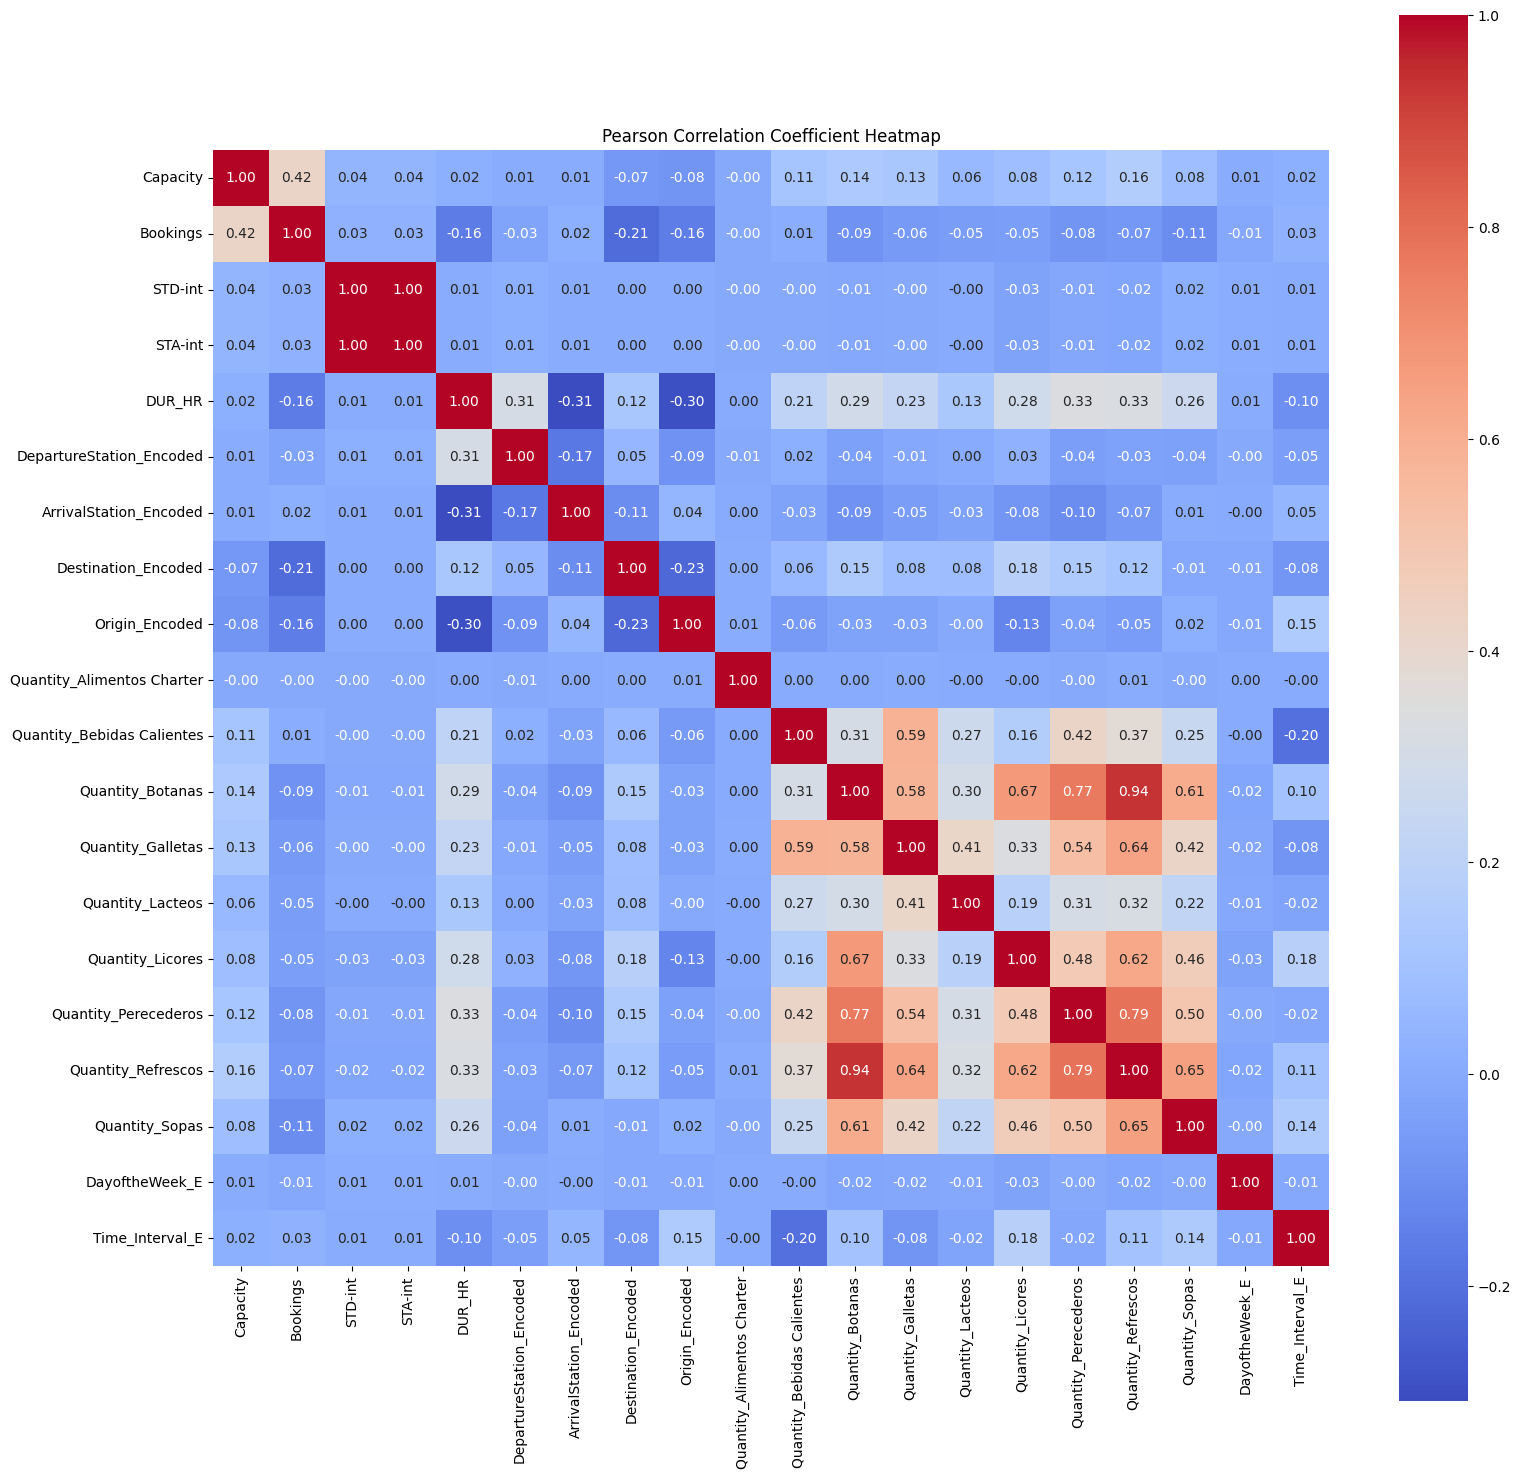

In [ ]:
df = cleaned.copy()
df = df.drop(df.columns[:4], axis=1)

# Remove sales columns
df_corr = df.drop(df.columns[19:28], axis=1)
df_corr = df_corr.drop(["Total_Quantity", "Passengers", "DUR_INTERVAL", "WeekoftheYear", "Month", "Week_Month_Label_E"], axis=1)

correlation_matrix = df_corr.corr()

plt.figure(figsize=(18, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Pearson Correlation Coefficient Heatmap')
plt.show()

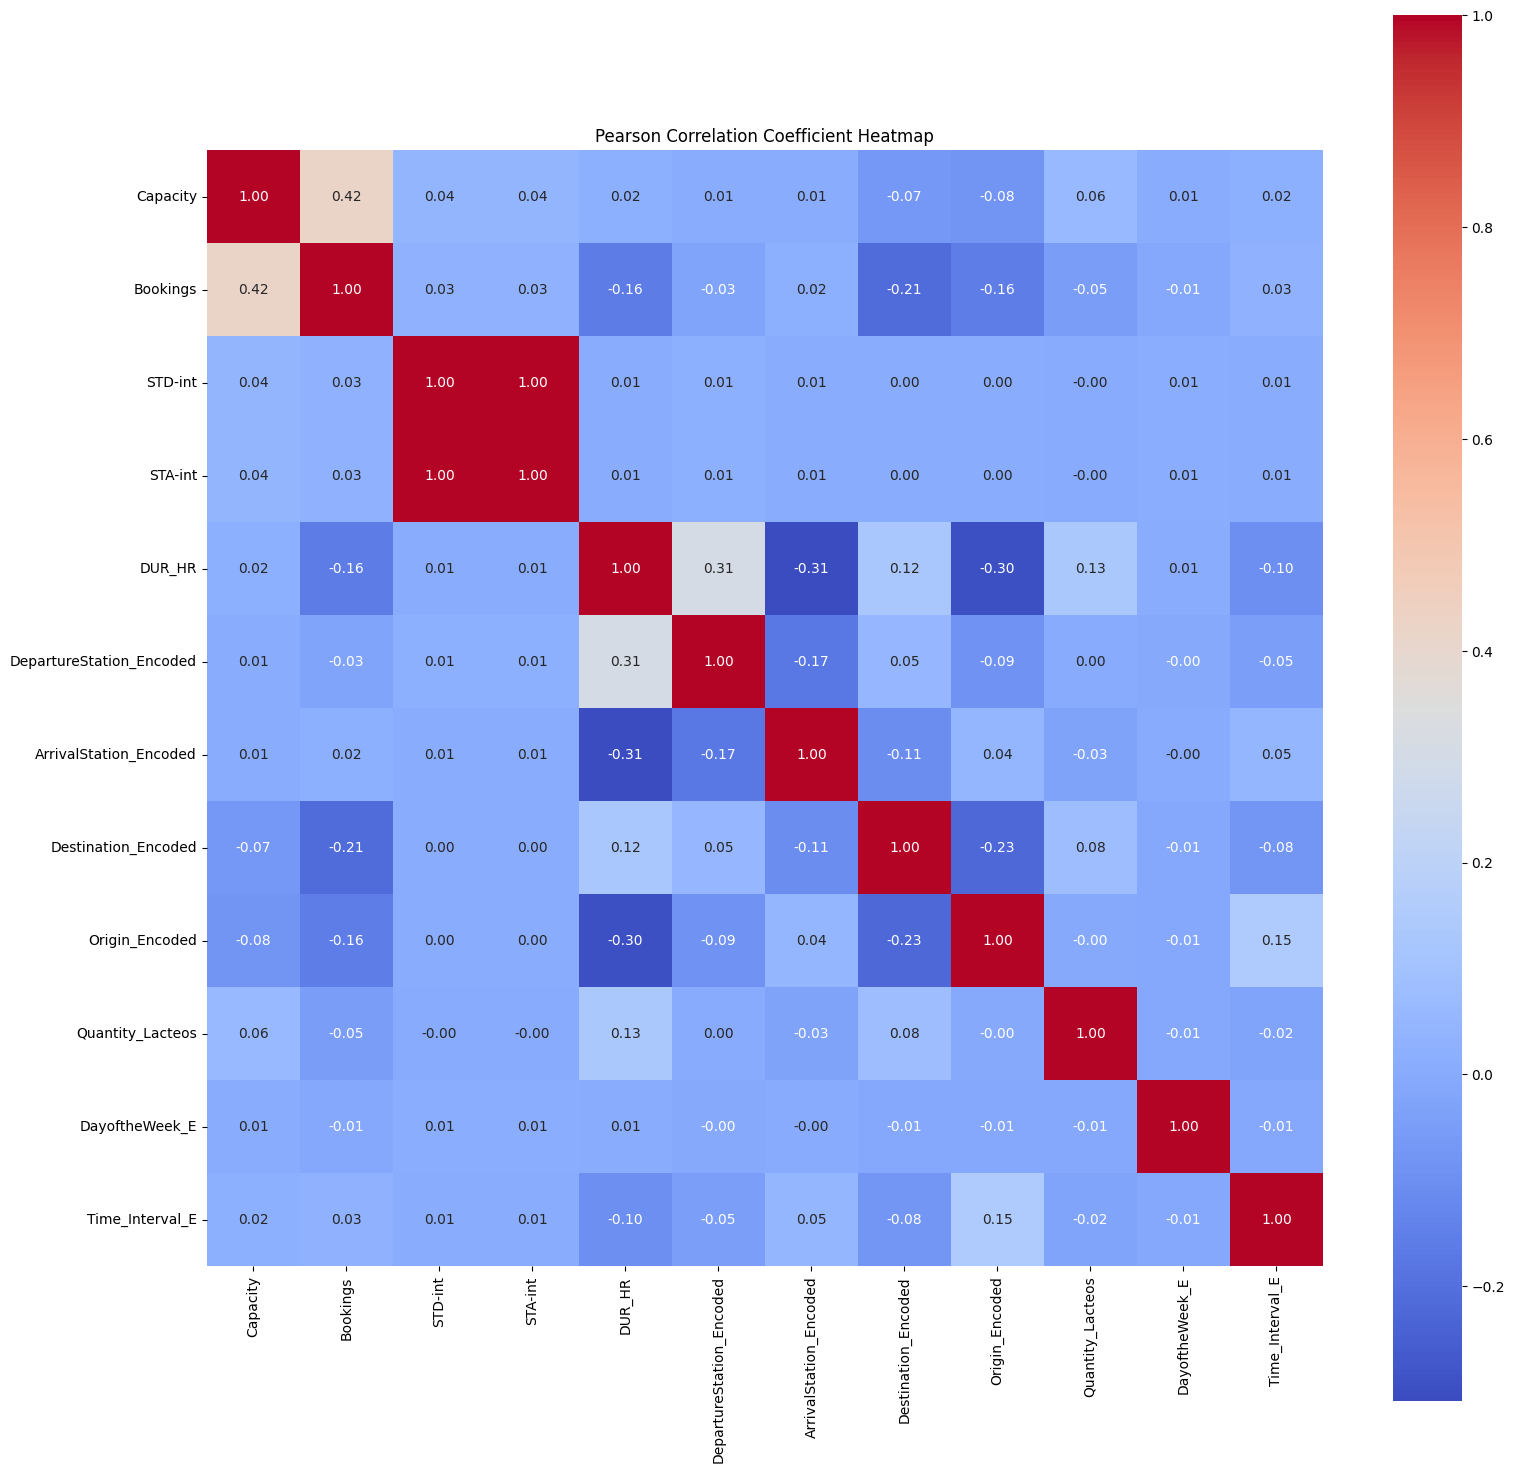

In [ ]:
desired_prod_types = ['Botanas', 'Licores', 'Galletas', 'Bebidas Calientes','Alimentos Charter', 'Perecederos', 'Refrescos', 'Sopas', 'Lacteos']
desired_prod_types = ["Quantity_"+i for i in desired_prod_types]

df_corr = df_corr.drop(desired_prod_types[0:-1], axis=1)

correlation_matrix = df_corr.corr()

plt.figure(figsize=(18, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Pearson Correlation Coefficient Heatmap')
plt.show()

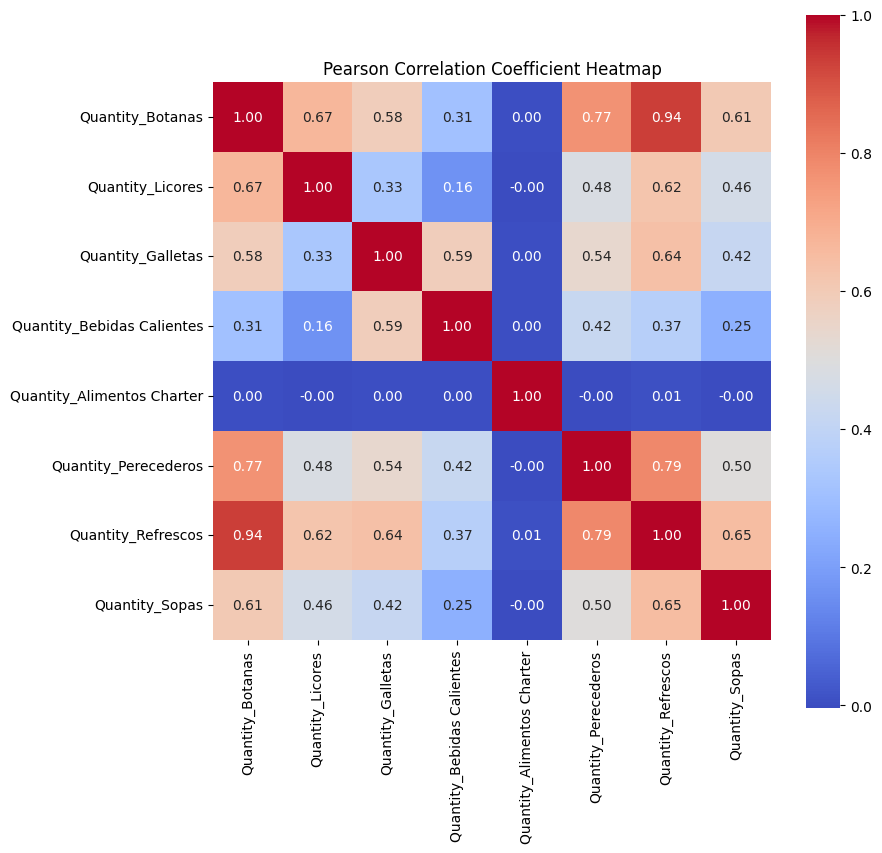

In [ ]:
desired_prod_types = ['Botanas', 'Licores', 'Galletas', 'Bebidas Calientes','Alimentos Charter', 'Perecederos', 'Refrescos', 'Sopas', 'Lacteos']
desired_prod_types = ["Quantity_"+i for i in desired_prod_types]

df_corr = df[desired_prod_types[0:-1]]

correlation_matrix = df_corr.corr()

plt.figure(figsize=(9, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Pearson Correlation Coefficient Heatmap')
plt.show()

### Rename of columns

In [ ]:
cleaned = cleaned.rename(columns={"DepartureStation_Encoded" : "DepartureStation_E", "ArrivalStation_Encoded" : "ArrivalStation_E", "Destination_Encoded" : "Destination_E", "Origin_Encoded" : "Origin_E"})
cleaned = cleaned.rename(columns={"Quantity_Alimentos Charter" : "Q_Alimentos Charter", "Quantity_Bebidas Calientes" : "Q_Bebidas Calientes", "Quantity_Botanas" : "Q_Botanas", "Quantity_Galletas" : "Q_Galletas", "Quantity_Lacteos" : "Q_Lacteos", "Quantity_Licores" : "Q_Licores", "Quantity_Perecederos" : "Q_Perecederos", "Quantity_Refrescos" : "Q_Refrescos", "Quantity_Sopas" : "Q_Sopas"})

### Drop all Total_Sales

In [ ]:
cleaned = cleaned.drop(["TotalSales_Alimentos Charter", "TotalSales_Bebidas Calientes", "TotalSales_Botanas", "TotalSales_Galletas", "TotalSales_Lacteos", "TotalSales_Licores", "TotalSales_Perecederos", "TotalSales_Refrescos", "TotalSales_Sopas"], axis=1)

### Drop all categorical columns that already encoded

In [ ]:
        cleaned = cleaned.drop(['DepartureStation', 'ArrivalStation'], axis=1)

In [ ]:
cleaned

,Flight_ID,Aeronave,DepartureStation,ArrivalStation,Capacity,Passengers,Bookings,STD-int,STA-int,DUR_HR,...,Q_Perecederos,Q_Refrescos,Q_Sopas,Total_Quantity,WeekoftheYear,Month,DUR_INTERVAL,DayoftheWeek_E,Time_Interval_E,Week_Month_Label_E
0,ab954014077430bd842cfa305a55c0f8,XA-VBY,AT,AZ,240,229.0,157.0,1.697716e+09,1.697726e+09,2.7500,...,4.0,17.0,0.0,42.0,42,10,2.0,4.0,1.0,42.0
1,efd86c996035dacdca7a0ccb2560dda1,XA-VIX,BM,AV,186,186.0,109.0,1.688346e+09,1.688360e+09,4.0000,...,1.0,6.0,2.0,15.0,27,7,3.0,1.0,0.0,22.0
2,dd0fad3248951d2f71d63e6279aeaa4b,XA-VBW,AW,AS,220,200.0,142.0,1.687792e+09,1.687795e+09,0.6667,...,0.0,0.0,0.0,0.0,26,6,0.0,1.0,2.0,21.0
3,d0987ee648eea254063bfe2b39571b67,XA-VAP,BA,AB,186,162.0,90.0,1.676018e+09,1.676023e+09,1.1667,...,3.0,7.0,0.0,22.0,6,2,1.0,0.0,1.0,57.0
4,3b5df8805161ea827d2f2e4298c38e06,XA-VBY,AJ,AR,240,183.0,125.0,1.694107e+09,1.694110e+09,0.9167,...,0.0,0.0,0.0,2.0,36,9,0.0,4.0,2.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119636,9bbd9f3a2bbcaeae864d17e3ee544d2c,XA-VAE,AT,BT,186,186.0,119.0,1.701867e+09,1.701879e+09,3.3333,...,5.0,13.0,4.0,34.0,49,12,3.0,6.0,2.0,51.0
119637,d9ef769565064b1ff1ad90d6d18f69cb,XA-VYF,AO,BT,180,166.0,89.0,1.703572e+09,1.703585e+09,3.8333,...,4.0,18.0,4.0,56.0,52,12,3.0,5.0,1.0,56.0
119638,598035669a4f0fa2ce1207977932df9e,XA-VAI,AW,BT,180,142.0,54.0,1.703759e+09,1.703771e+09,3.4167,...,8.0,50.0,5.0,128.0,52,12,3.0,4.0,1.0,56.0
119639,cc7c1c5e6fd132fd0bdab3a35aac33c0,XA-VBK,BM,BT,240,189.0,86.0,1.703835e+09,1.703861e+09,7.3333,...,15.0,54.0,18.0,179.0,52,12,7.0,0.0,1.0,56.0


# Export dataset to CSV

In [ ]:
cleaned.to_csv("Dataset_Post_Analysis.csv", index=False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=25b1adb0-2b47-474f-a7b7-c06d723a95f4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>